## **What is sound, and how do you cook it? # (by the way - this is black magic, just so you know)**

- Sound (in the classical sense) is vibrations of a body that propagate through air.
- Or through any other elastic medium (such as liquids or solids). In a vacuum, only the source can vibrate - sound itself has nowhere to propagate.
# 
- It’s described by physical parameters - frequency, amplitude, and wavelength.
- In musical perception - by pitch, timbre, and loudness.
- It’s measured in decibels and hertz, and analyzed using spectrograms and waveforms.
# 
- Examples of sound include waves on a guitar string, air columns in organ pipes, resonance modes of a drum body, sharp impacts or explosions, and even ultrasound and infrasound, which we can’t hear.
- All of these affect the environment and can be measured.
# 
- So sound can take the form of both harmonic, orderly waves and chaotic, brutal vibrations.
- And everything that follows is about learning how to tame this chaos.

Here's a Signal Generator for you to test out. It has 4 kind of waves you would usually find in a synthesizer (with Sine being the most important one for understanding of audio).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, square, sawtooth
import ipywidgets as widgets
from ipywidgets import interactive, IntSlider, ToggleButton, VBox, Layout, Dropdown
from IPython.display import Audio, display, clear_output

fs = 48000
duration = 1.0
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

SPEED_OF_SOUND = 343.0  # m/s (air, ~20°C)

current_signal = np.zeros_like(t)

# --- Generate different waveforms ---
def generate_wave(freq, waveform="Sine", amplitude=0.8):
    if waveform == "Sine":
        return amplitude * np.sin(2 * np.pi * freq * t)
    elif waveform == "Triangle":
        return amplitude * sawtooth(2 * np.pi * freq * t, width=0.5)
    elif waveform == "Square":
        return amplitude * square(2 * np.pi * freq * t)
    elif waveform == "Sawtooth":
        return amplitude * sawtooth(2 * np.pi * freq * t)
    return np.zeros_like(t)

# Output area for audio only (so we don't clear the whole UI)
audio_out = widgets.Output()

def plot_wave_and_spectrogram(freq, waveform):
    global current_signal

    signal = generate_wave(freq, waveform)
    current_signal = np.tile(signal, 10)  # 10 seconds loop

    wavelength_cm = (SPEED_OF_SOUND / freq) * 100.0

    fig, axs = plt.subplots(2, 1, figsize=(20, 6))

    # Waveform (show ~2000 samples)
    n_show = 2000
    axs[0].plot(t[:n_show], signal[:n_show])
    axs[0].set_title(f"{waveform} Wave — {freq} Hz")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)

    axs[0].text(
        0.02, 0.90,
        f"Wavelength: {wavelength_cm:.1f} cm",
        transform=axs[0].transAxes,
        bbox=dict(facecolor="white", alpha=0.8)
    )

    # Spectrogram (use power -> 10*log10, add eps to avoid -inf)
    f, tt, Sxx = spectrogram(signal, fs=fs, nperseg=1024, noverlap=768, mode="psd")
    axs[1].pcolormesh(tt, f, 10 * np.log10(Sxx + 1e-12), shading="gouraud")
    axs[1].set_ylim(0, fs / 2)
    axs[1].set_title("Spectrogram")
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Frequency (Hz)")

    plt.tight_layout()
    plt.show()

    # If currently playing, refresh the audio widget with the new signal
    if play_toggle.value:
        with audio_out:
            clear_output(wait=True)
            display(Audio(current_signal, rate=fs, autoplay=True))

wave_dropdown = Dropdown(
    options=["Sine", "Triangle", "Sawtooth", "Square"],
    value="Sine",
    description="Waveform:",
    layout=Layout(width="300px")
)

freq_slider = IntSlider(
    value=440,
    min=20,
    max=20000,
    step=1,
    description="Frequency (Hz)",
    continuous_update=False,
    layout=Layout(width="1450px"),
    style={"description_width": "initial"}
)

interactive_plot = interactive(
    plot_wave_and_spectrogram,
    freq=freq_slider,
    waveform=wave_dropdown
)

play_toggle = ToggleButton(
    value=False,
    description="▶ Play",
    button_style="success"
)

def toggle_audio(change):
    if change["new"]:
        play_toggle.description = "■ Stop"
        play_toggle.button_style = "danger"
        with audio_out:
            clear_output(wait=True)
            display(Audio(current_signal, rate=fs, autoplay=True))
    else:
        play_toggle.description = "▶ Play"
        play_toggle.button_style = "success"
        with audio_out:
            clear_output(wait=True)

play_toggle.observe(toggle_audio, names="value")

ui = VBox([interactive_plot, play_toggle, audio_out])
display(ui)


**How to understand a waveform and a spectrogram**
- A waveform is just a representation of amplitude over time. It shows peaks and vibrations of the audio signal (Amplitude vs time).
- A spectrogram shows much more: which frequencies exist, how strong they are, and how they evolve over time (Frequency vs time, with color = energy).
# 
- Frequencies are given in the range of human hearing - 20 Hz to 20 kHz.
- Examples are given using aproximal speed of sound in air (at 20°C) - 343 m/s.

## **So what does the sound consist of?**

1. **Frequencies**

- Frequency is the amount of cycles (or vibrations) of a sound wave per second measured in Hertz (Hz).
- Frequencies can be divided into octaves (each octave represents a multiplication by two), which is a logarithmic scale. In musical terms, each octave is split into 12 notes. There are always only 12 notes between any two octaves - whether it’s 20–40 Hz or 10–20 kHz. Multiplying or dividing a frequency by 2 produces the same musical note, one octave higher or lower. You can try it yourself using the generator above.
- They are also splited into bands: Low (20 to 250 Hz), Low Midrange (250 to 500 Hz), Midrange (500 Hz to 2 kHz), Upper Midrange (2 to 4 kHz), Presence (4 to 6 kHz) and Highs (6 to 20 kHz).
- Frequencies have wavelength measured in meters, as you can see in the examples above and below.
- In the other words, it's distance in which wave goes though full rotation (or a cycle of a sine wave), like 0 → +1 → 0 → -1 → 0 as an example. # You will understand more of this when we go into phase and after looking at example below.
- Sine and cosine waves are practically the same in audio engineering. They are just shifted versions of each other in time. It's just a natural shift in time (or movement to right on the graph) that change one into the other.

In audio engineering adressed by:
- Filters - first of all, High-Pass (Low-Cut) and Low-Pass (High-Cut) filters, which simply remove frequencies below or above a chosen cutoff.
- Equalizers (EQ) - more complex filters that can also boost or reduce specific frequency bands.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive

# Constants
speed_of_sound = 343  # Speed of sound in air (m/s)

def update_plot(frequency=100, phase_shift=0):
    wavelength = speed_of_sound / frequency
    
    x = np.linspace(0, 10, 1000)
    y = np.sin(2 * np.pi * frequency * x / speed_of_sound + np.deg2rad(phase_shift))  # Phase shift added here
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Amplitude')
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=1)
    
    ax.plot(x, y, label=f'Frequency: {frequency} Hz', color='b')
    ax.axvline(wavelength, color='r', linestyle='--', label=f'Wavelength: {wavelength:.2f} m')
    
    plt.legend(loc='upper right')
    plt.show()

freq_slider = widgets.FloatSlider(
    value=100,
    min=50,
    max=1000,
    step=1,
    description='Frequency (Hz):',
    continuous_update=False,
    layout=widgets.Layout(width='400px'),
    style={'description_width': 'initial'}
)

phase_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=360,
    step=1,
    description='Phase Shift (°):',
    continuous_update=False,
    layout=widgets.Layout(width='400px'),
    style={'description_width': 'initial'} 
)

interactive_plot = interactive(update_plot, frequency=freq_slider, phase_shift=phase_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=100.0, continuous_update=False, description='Frequency (Hz):', layout=…

2. **Amplitudes/Dynamics**
- Amplitude describes how loud or quiet a sound is, expressed in dB.
- dB (decibel) is a logarithmic relative unit, not an absolute one - it measures ratios of level. +6 dB is roughly a doubling of amplitude, while −6 dB halves it.

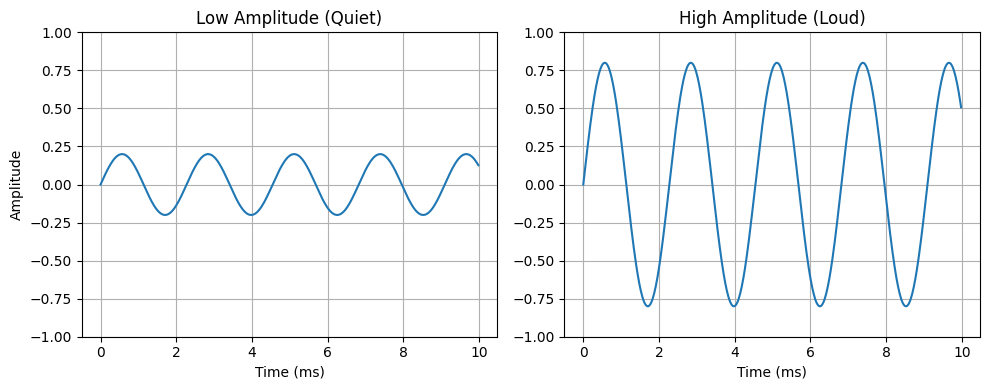

In [4]:
import numpy as np
import matplotlib.pyplot as plt

sr = 48000
t = np.linspace(0, 0.01, int(sr * 0.01), endpoint=False)
freq = 440

low_amp = 0.2 * np.sin(2*np.pi*freq*t)
high_amp = 0.8 * np.sin(2*np.pi*freq*t)

plt.figure(figsize=(10,4))

ylim = (-1.0, 1.0)  # same scale for both

plt.subplot(1,2,1)
plt.plot(t*1000, low_amp)
plt.title("Low Amplitude (Quiet)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.ylim(ylim)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(t*1000, high_amp)
plt.title("High Amplitude (Loud)")
plt.xlabel("Time (ms)")
plt.ylim(ylim)
plt.grid(True)

plt.tight_layout()
plt.show()


There are 3 different types of dB, each representing different domains:
1. dB SPL - Sound Pressure Level, referenced to 20 µPa (air pressure - what your ears hear). The problem is that our ears don’t hear all frequencies equally (we'll cover that later), so ultrasound at 40 kHz, at any level, won't be audible. At high SPL (like deep bass or explosions), you stop hearing and start feeling vibration physically.
2. dBu (professional) / dBV (consumer) - Electrical signal level, measured in volts (analog domain). This is the electrical output of a microphone and what's processed in analog devices.
3. dBFS - Digital Full Scale - what we get from an audio interface and use in computers. Here, 0 dBFS is the absolute maximum (anything above clips). As a professional audio standard, 0 dBu ≈ −18 dBFS, but this calibration can be changed in hardware or lab setups - it’s just an agreement, not ground truth (though you'll probably never see anything different in practice).
# 
- dBSPL starts at zero and goes up, while dBFS uses zero as the maximum (so values are usually negative).
- dBu/dBV are relative analog levels centered around their reference and can handle some positive values. In practice, signals are kept below 0, while positive values represent analog headroom (they can physically handle it) rather than normal operating level - though you can intentionally push into positive values to create saturation or distortion.
#
- Sidenote: recording level is always a trade-off between noise (too quiet) and distortion/clipping (too loud).
# 
Here's what happens to sound when it gets too loud in different domains. In digital audio there’s no forgiveness - you hit a hard ceiling, and the waveform is squashed, not reshaped.

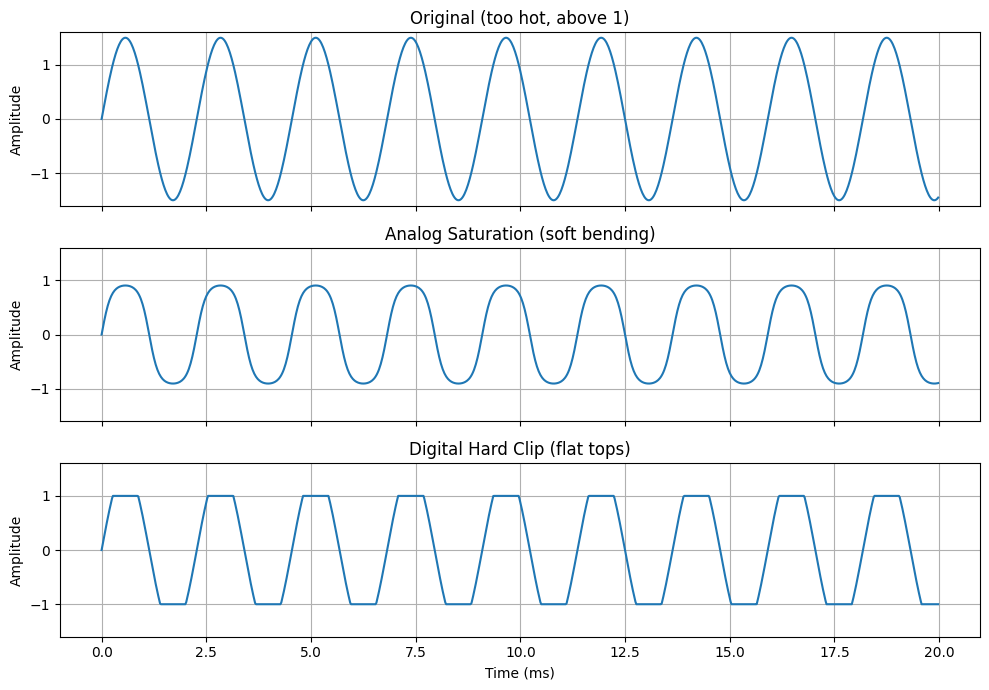

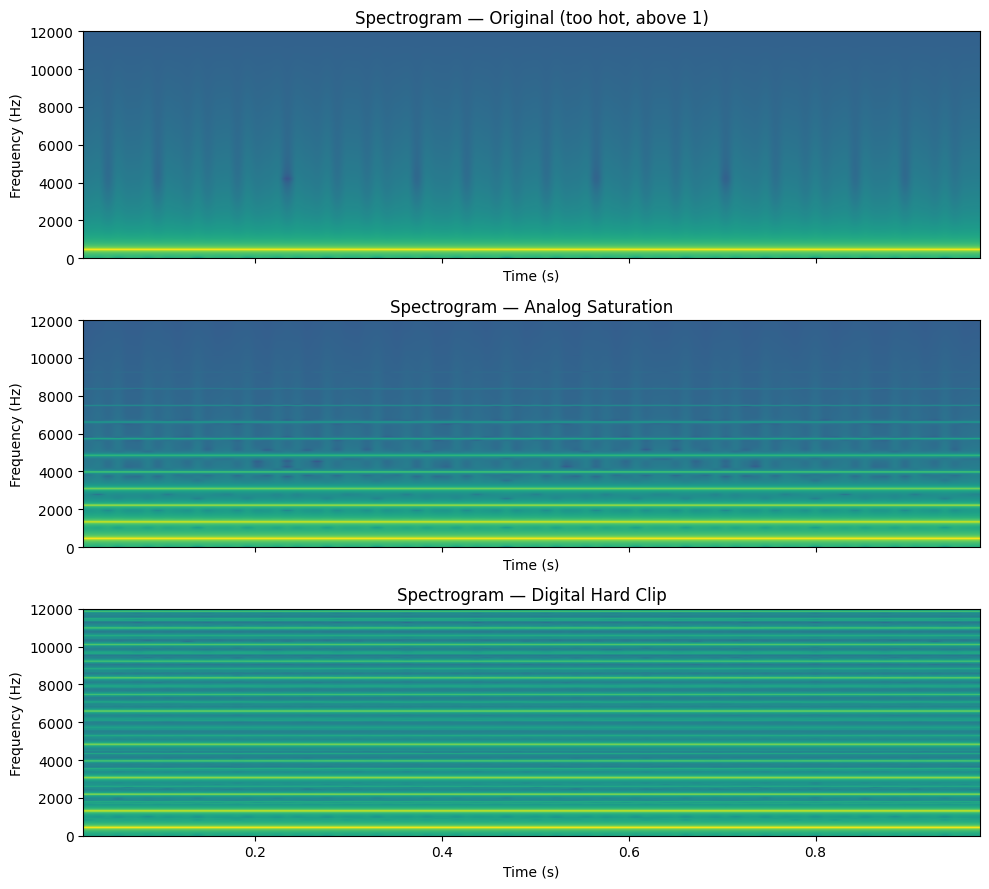

Original:


Analog Saturation:


Digital Hard Clip:


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

sr = 48000
duration = 1.0
t = np.linspace(0, duration, int(sr * duration), endpoint=False)
freq = 440

# Hot sine (intentionally too loud)
x = 1.5 * np.sin(2*np.pi*freq*t)

# Analog-style saturation (soft clip)
analog = np.tanh(x)

# Digital hard clip
digital = np.clip(x, -1.0, 1.0)

# ---------------- Waveform plots (zoom 20 ms) ----------------
ylim = (-1.6, 1.6)
plot_n = int(sr * 0.02)

fig, ax = plt.subplots(3, 1, figsize=(10, 7), sharex=True, sharey=True)

ax[0].plot(t[:plot_n]*1000, x[:plot_n])
ax[0].set_title("Original (too hot, above 1)")

ax[1].plot(t[:plot_n]*1000, analog[:plot_n])
ax[1].set_title("Analog Saturation (soft bending)")

ax[2].plot(t[:plot_n]*1000, digital[:plot_n])
ax[2].set_title("Digital Hard Clip (flat tops)")

for a in ax:
    a.set_ylim(ylim)
    a.grid(True)
    a.set_ylabel("Amplitude")

ax[2].set_xlabel("Time (ms)")
plt.tight_layout()
plt.show()

# ---------------- Spectrogram helper ----------------
def show_spec(sig, title):
    plt.specgram(sig, NFFT=2048, Fs=sr, noverlap=1536)
    plt.ylim(0, 12000)  # show up to 12 kHz for readability
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

fig, ax = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

plt.sca(ax[0])
show_spec(x, "Spectrogram — Original (too hot, above 1)")

plt.sca(ax[1])
show_spec(analog, "Spectrogram — Analog Saturation")

plt.sca(ax[2])
show_spec(digital, "Spectrogram — Digital Hard Clip")

plt.tight_layout()
plt.show()

# ---------------- Listen ----------------
print("Original:")
display(Audio(x, rate=sr))

print("Analog Saturation:")
display(Audio(analog, rate=sr))

print("Digital Hard Clip:")
display(Audio(digital, rate=sr))


- Dynamics are simply the dance of amplitude over time.

Here's a couple of simple examples:

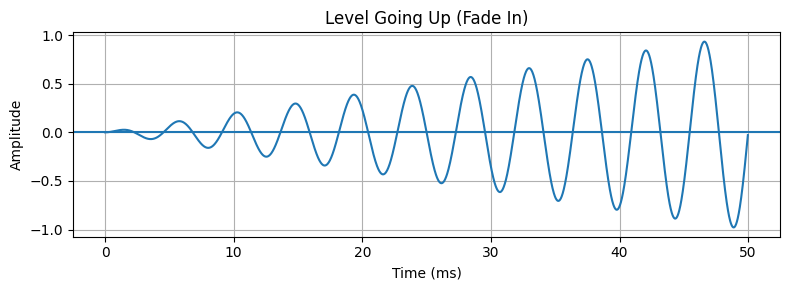

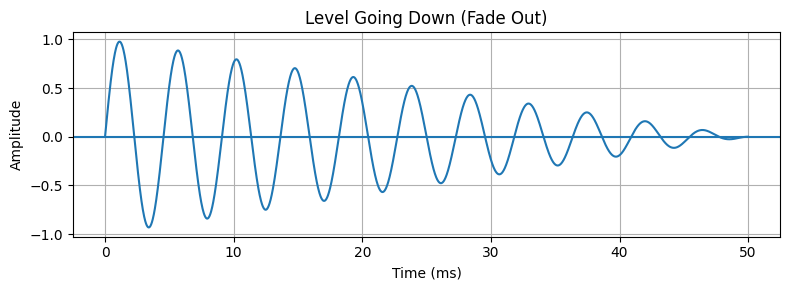

In [6]:
import numpy as np
import matplotlib.pyplot as plt

sr = 48000
duration = 0.05
t = np.linspace(0, duration, int(sr * duration), endpoint=False)
freq = 220

# Base sine wave
wave = np.sin(2 * np.pi * freq * t)

# Volume envelopes
fade_in = np.linspace(0, 1, len(t))   # volume going up
fade_out = np.linspace(1, 0, len(t)) # volume going down

up = wave * fade_in
down = wave * fade_out

# Volume going UP
plt.figure(figsize=(8,3))
plt.plot(t * 1000, up)
plt.axhline(0)
plt.title("Level Going Up (Fade In)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Volume going DOWN
plt.figure(figsize=(8,3))
plt.plot(t * 1000, down)
plt.axhline(0)
plt.title("Level Going Down (Fade Out)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


This concept is better described by ADSR, which is usually used in synthesizers, but is also useful for understanding other kinds of signals.
1. Attack - the time it takes to go from zero to peak level.
2. Decay - the time it takes to fall from peak to the Sustain level.
3. Sustain - the level that is maintained while the key is held down.
4. Release - how long it takes for the sound to fade away after the key is released.
# 
Here's an example:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

sr = 48000
duration = 1.6
t = np.linspace(0, duration, int(sr * duration), endpoint=False)

freq = 220.0
wave = np.sin(2*np.pi*freq*t)

def make_adsr_env(A, D, S, R):
    env = np.zeros_like(t)

    a_n = int(A * sr)
    d_n = int(D * sr)
    r_n = int(R * sr)

    total = len(t)
    s_n = max(total - (a_n + d_n + r_n), 0)

    i = 0

    # Attack: 0 -> 1
    if a_n > 0:
        env[i:i+a_n] = np.linspace(0, 1, a_n, endpoint=False)
    i += a_n

    # Decay: 1 -> S
    if d_n > 0 and i < total:
        end = min(i + d_n, total)
        env[i:end] = np.linspace(1, S, end - i, endpoint=False)
        i = end

    # Sustain: hold S
    if i < total:
        end = min(i + s_n, total)
        env[i:end] = S
        i = end

    # Release: current level -> 0 (safe even if A=0, D=0, etc.)
    if r_n > 0 and i < total:
        start_level = env[i-1] if i > 0 else 0.0
        env[i:] = np.linspace(start_level, 0, total - i, endpoint=True)

    return env

def plot_adsr(A=0.1, D=0.15, S=0.6, R=0.3, level=0.9):
    env = make_adsr_env(A, D, S, R)
    out = level * wave * env

    # Envelope
    plt.figure(figsize=(10,3))
    plt.plot(t, env)
    plt.title("ADSR Envelope")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.ylim(-0.05, 1.05)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Waveform (full 1.6 s, but in ms)
    zoom = len(t)
    plt.figure(figsize=(10,3))
    plt.plot(t[:zoom]*1000, out[:zoom])
    plt.title("Waveform with ADSR (full duration)")
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude")
    plt.ylim(-1, 1)  # always keep -1 to +1
    plt.grid(True)
    plt.tight_layout()
    plt.show()

_ = interact(
    plot_adsr,
    A=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.10, description="Attack"),
    D=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.15, description="Decay"),
    S=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.60, description="Sustain"),
    R=FloatSlider(min=0.0, max=1.5, step=0.01, value=0.30, description="Release"),
    level=FloatSlider(min=0.05, max=1.0, step=0.01, value=0.90, description="Level"),
)


interactive(children=(FloatSlider(value=0.1, description='Attack', max=1.0, step=0.01), FloatSlider(value=0.15…

Adressed by:
- Compression - reduces dynamic range above a certain threshold, helping maintain overall audio level. If you have a singer who’s too quiet in the verses but too loud in the chorus - this is the way to go.
- Limiting — very high-ratio, fast compression that prevents short-term signal peaks from exceeding a level. Think of a loud drum hit or any other short blast (transient) you want to control.
- Expanding - makes quiet sounds below threshold quieter. For example, when you have many microphones on a drum kit, you may want each mic to stay quiet until its specific drum is hit.
- Gate - removes (or heavily attenuates) quiet sounds below the threshold completely. Imagine hiss from a guitar amp when you’re not playing - a gate removes that noise when the signal isn't there.

3. **Phase and Space**
- Phase is an angle of rotation of wave measured in degrees.
- Phase is time expressed as angle, and space becomes phase because sound takes time to travel.
- Here's how it works:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import NullLocator
from matplotlib.lines import Line2D
from IPython.display import display, HTML

BLUE = "#1f4cff"

def make_animation(f_hz=0.3, fps=60, seconds=4, cycles_on_screen=1.2):
    w = 2 * np.pi * f_hz
    nframes = int(fps * seconds)

    T = 1.0 / f_hz
    window = cycles_on_screen * T

    fig = plt.figure(figsize=(10, 4))
    gs = fig.add_gridspec(1, 2, width_ratios=[1.25, 1.0], wspace=0.25)

    ax_time = fig.add_subplot(gs[0, 0])
    ax_phasor = fig.add_subplot(gs[0, 1])

    # ---- LEFT: time-domain sine ----
    ax_time.axhline(0, lw=1)
    ax_time.axvline(0, lw=1)
    ax_time.set_xlim(-window, 0)
    ax_time.set_ylim(-1.1, 1.1)
    ax_time.set_xticks([])
    ax_time.set_yticks([])

    t_line = np.linspace(-window, 0, 800)
    line_time, = ax_time.plot(t_line, np.sin(w * t_line), lw=2, color=BLUE)
    dot_time,  = ax_time.plot([0], [0], marker="o", markersize=7, color=BLUE)

    # ---- RIGHT: unit circle + phasor ----
    ax_phasor.set_aspect("equal", adjustable="box")
    ax_phasor.axhline(0, lw=1)
    ax_phasor.axvline(0, lw=1)
    ax_phasor.set_xlim(-1.2, 1.2)
    ax_phasor.set_ylim(-1.2, 1.2)
    ax_phasor.set_xticks([])
    ax_phasor.set_yticks([])
    ax_phasor.xaxis.set_minor_locator(NullLocator())
    ax_phasor.yaxis.set_minor_locator(NullLocator())

    th = np.linspace(0, 2*np.pi, 512)
    ax_phasor.plot(np.cos(th), np.sin(th), lw=2, linestyle=(0, (2, 3)), color=BLUE)
    
    ax_phasor.text(-1.05, 0, "0",   va="center", ha="right", fontsize=12, fontweight="bold")
    ax_phasor.text(1.05, 0, "180", va="center", ha="left", fontsize=12, fontweight="bold")
    ax_phasor.text(0, 1.05, "90",   va="bottom", ha="center", fontsize=12, fontweight="bold")
    ax_phasor.text(0, -1.05, "270", va="top", ha="center", fontsize=12, fontweight="bold")

    phasor_line, = ax_phasor.plot([0, 0], [0, 0], lw=2, color=BLUE)
    dot_phasor,  = ax_phasor.plot([1], [0], marker="o", markersize=7, color=BLUE)

    # ---- Figure-level connector lines (span between axes) ----
    conn_diag = Line2D([], [], lw=2, color=BLUE, transform=fig.transFigure, clip_on=False, zorder=50)
    conn_h    = Line2D([], [], lw=2, color=BLUE, transform=fig.transFigure, clip_on=False, zorder=50)
    fig.add_artist(conn_diag)
    fig.add_artist(conn_h)

    inv = fig.transFigure.inverted()
    dt = 1.0 / fps

    def to_fig_coords(ax, xy):
        disp = ax.transData.transform(xy)   # data -> display
        return inv.transform(disp)          # display -> figure fraction

    def update(i):
        t = i * dt

        # Wave travels RIGHT -> LEFT
        y = np.sin(w * (t_line + t))
        line_time.set_ydata(y)

        # Current sample at right edge (x=0)
        y_now = np.sin(w * t)
        dot_time.set_data([0], [y_now])

        # Phasor matches the same phase
        ang = (np.pi - w * t) % (2*np.pi)
        x = np.cos(ang)
        y2 = np.sin(ang)
        phasor_line.set_data([0, x], [0, y2])
        dot_phasor.set_data([x], [y2])

        # Compute endpoints in figure coordinates
        A = to_fig_coords(ax_time,   (0, y_now))  # sine dot
        B = to_fig_coords(ax_phasor, (x, y2))     # phasor dot
        Y = to_fig_coords(ax_phasor, (0, y2))     # y projection on phasor y-axis
        O = to_fig_coords(ax_phasor, (0, 0))      # origin
        X = to_fig_coords(ax_phasor, (x, 0))      # x projection on phasor x-axis

        # 3 connector lines (like the GIF)
        conn_diag.set_data([A[0], B[0]], [A[1], B[1]])  # diagonal
        conn_h.set_data([A[0], Y[0]], [A[1], Y[1]])     # horizontal (same y)

        # With blit=False we can just return nothing special, but returning is fine too
        return (line_time, dot_time, phasor_line, dot_phasor, conn_diag, conn_h)

    # ✅ IMPORTANT: blit=False fixes missing-connector issue in JSHTML
    anim = FuncAnimation(fig, update, frames=nframes, interval=1000/fps, blit=False)
    plt.close(fig)
    return anim

anim = make_animation(f_hz=1.0, fps=60, seconds=4, cycles_on_screen=1.2)
display(HTML(anim.to_jshtml()))


- If two waves are in phase, they add together, increasing amplitude (constructive interference).
- If two waves are exactly 180° out of phase and equal in level, they cancel completely (perfect destructive interference usually only achived in digital domain).
- In all other cases, they partially add and partially cancel, producing a new combined waveform (this is what happens most of the time).
<div>
<img src="cookbook_images/waves.png">
</div>

# 
- Phase plays a crucial role in audio interactions.
- In reality, addition and cancellation happen simultaneously across different frequencies.
- Some frequencies add, some cancel, at the same time. That’s phase interaction.
# 
Here's how two signals sum depending on phase:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

sr = 48000
t = np.linspace(0, 0.01, int(sr * 0.01), endpoint=False)  # short window
freq = 440

def plot_phase(phase_deg=0):

    phase = np.deg2rad(phase_deg)

    a = np.sin(2*np.pi*freq*t)
    b = np.sin(2*np.pi*freq*t + phase)
    s = a + b

    plt.figure(figsize=(10,4))

    plt.plot(t*1000, a, label="Wave A", alpha=0.7)
    plt.plot(t*1000, b, label=f"Wave B ({phase_deg:.0f}°)", alpha=0.7)
    plt.plot(t*1000, s, label="Sum", linewidth=2)

    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude")
    plt.title("Phase Interaction")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

_ = interact(
    plot_phase,
    phase_deg=FloatSlider(
        min=0,
        max=360,
        step=5,
        value=0,
        description="B Degrees"
    )
)


interactive(children=(FloatSlider(value=0.0, description='B Degrees', max=360.0, step=5.0), Output()), _dom_cl…

# 
- Phase interaction is also a main part of what we call Reverb - or what happens to sound in space.
- People often call this 'echo', but scientifically speaking that's usually incorrect.
- Echo is a clearly separated repeat of the sound (or delay - you hear discrete copies: hey-ey-ey-ey).
- Reverb is thousands of very short delays and reflections, all overlapping in time.
# 
- Reverb is essentially a tail of sound returning from many directions, shaped by phase and space.
- Imagine yourself in a big underground concrete parking garage - that’s how it sounds.
- Those tiny reflections arrive with slightly different delays → different phases → partial additions and cancellations across the spectrum.
- Reverb is phase geometry in space.
- All spatial effects interact with phase.
# 
Here's quick example of a Reverb:

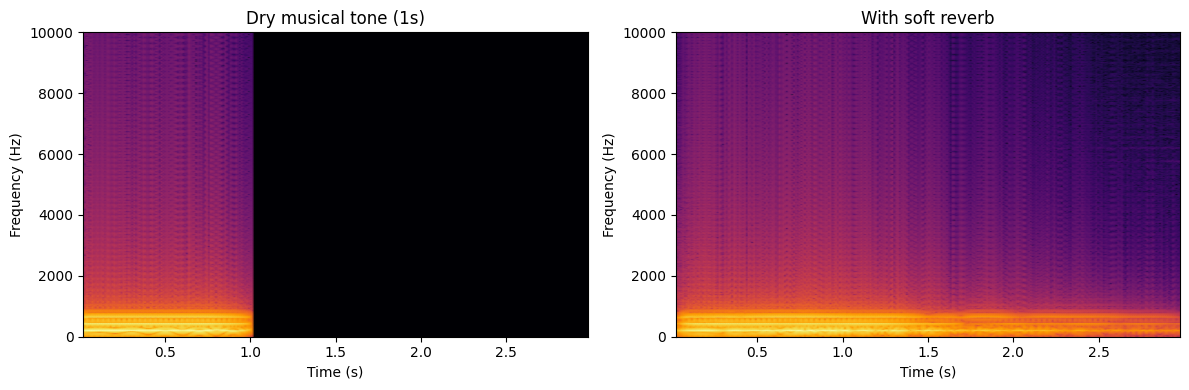

Dry:


Wet (listen after 1s):


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve, butter, lfilter, spectrogram
from IPython.display import Audio, display

sr = 48000
total_dur = 3.0
tone_dur = 1.0

t = np.linspace(0, total_dur, int(sr * total_dur), endpoint=False)

# ======================
# Nice musical dry sound
# ======================

dry = np.zeros_like(t)
tone_t = np.linspace(0, tone_dur, int(sr * tone_dur), endpoint=False)

f0 = 220.0  # A3
vib = 0.003 * np.sin(2 * np.pi * 5 * tone_t)

sig = (
    np.sin(2*np.pi*f0*(1+vib)*tone_t) +
    0.4*np.sin(2*np.pi*2*f0*tone_t) +
    0.2*np.sin(2*np.pi*3*f0*tone_t)
)

attack = 0.05
release = 0.25
env = np.ones_like(tone_t)
env *= np.minimum(tone_t / attack, 1.0)
env *= np.minimum((tone_dur - tone_t) / release, 1.0)

dry[:len(tone_t)] = 0.3 * sig * env
dry = dry.astype(np.float32)

# ======================
# Soft room IR
# ======================

rt60 = 2.4
predelay_ms = 25

ir_len = int(2 * rt60 * sr)
n = np.arange(ir_len)

decay = np.exp(-6.9078 * n / (rt60 * sr))
noise = np.random.randn(ir_len)

b, a = butter(2, 4500 / (sr / 2))
noise = lfilter(b, a, noise)

ir = decay * noise * 0.4

predelay = int(predelay_ms * 1e-3 * sr)
ir = np.concatenate([np.zeros(predelay), ir])[:ir_len]
ir /= np.max(np.abs(ir)) + 1e-12

# ======================
# Convolution
# ======================

wet = fftconvolve(dry, ir, mode="full")[:len(dry)]
mix = 0.25
out = (1 - mix) * dry + mix * wet
out /= np.max(np.abs(out)) + 1e-12

# ======================
# Spectrograms (NO log10(0))
# ======================

def show_spec(x, title):
    f, tt, S = spectrogram(
        x, fs=sr, nperseg=2048, noverlap=1536, mode="magnitude"
    )
    SdB = 20 * np.log10(S + 1e-12)  # <- epsilon avoids -inf
    plt.pcolormesh(tt, f, SdB, shading="gouraud", cmap="inferno")
    plt.ylim(0, 10000)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
show_spec(dry, "Dry musical tone (1s)")
plt.subplot(1,2,2)
show_spec(out, "With soft reverb")
plt.tight_layout()
plt.show()

# ======================
# Listen
# ======================

print("Dry:")
display(Audio(dry, rate=sr))
print("Wet (listen after 1s):")
display(Audio(out, rate=sr))


Adressed by:
- Manual phase/time alignment if needed.
- Delays (especially short ones) and reverb.
- Other spatial effects (like true panning and 3D sound placement).

4. **Harmonics/Saturation (and Distortion)**
- Bodies don’t only oscillate as a whole. They also vibrate in halves, thirds, quarters, and so on.
- These are called **harmonics** (or harmonic oscillations).
- Here's an example of harmonics in a string (but they also occur in other bodies):

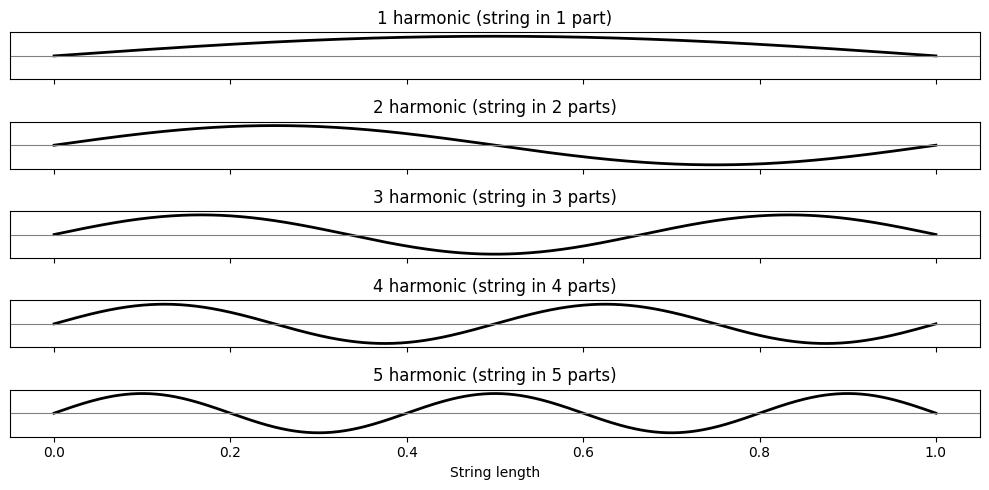

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 1000)

modes = [1, 2, 3, 4, 5]

fig, axs = plt.subplots(len(modes), 1, figsize=(10, 5), sharex=True)

for i, n in enumerate(modes):
    y = np.sin(n * np.pi * x)
    axs[i].plot(x, y, color="black", lw=2)
    axs[i].axhline(0, color="gray", lw=0.8)
    axs[i].set_ylim(-1.2, 1.2)
    axs[i].set_yticks([])
    axs[i].set_title(f"{n} harmonic (string in {n} part{'s' if n>1 else ''})")

axs[-1].set_xlabel("String length")

plt.tight_layout()
plt.show()


- Each harmonic multiplies the original frequency by an integer, so the harmonic series goes 100 Hz, 200 Hz, 300 Hz, 400 Hz, ...
- These all exist simultaneously - each successive section moves in the opposite direction to the previous one.
# 
- Harmonics are an essential part of almost any sound — different amounts of them give each sound its essential characteristics and character (timbre).
- Harmonics generally fade as they go higher in frequency and become less stable and weaker.
# 
- In music, harmonics are called overtones. 
- The only difference is naming: the 1st harmonic is called the fundamental frequency, and the 2nd harmonic becomes the 1st overtone. (So yes - 'do we start counting from 0 or 1?' problem shows up here too.)
# 
- Here's an example of adding harmonics to a 440 Hz wave:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import ipywidgets as widgets
from IPython.display import Audio, display, clear_output

# ---------------- Settings ----------------
FS = 48_000
DURATION = 1.5
T = np.arange(int(FS * DURATION)) / FS

F0 = 440.0
MAX_HARMONICS = 10
NPERSEG = 2048
NOVERLAP = 1536
FMAX_PLOT = 8000
# ----------------------------------------

current_audio = None

def make_harmonic_stack(n):
    x = np.zeros_like(T)
    for k in range(1, n + 1):
        x += (1/k) * np.sin(2*np.pi*(k*F0)*T)
    x /= np.max(np.abs(x))
    return x

slider = widgets.IntSlider(
    value=1,
    min=1,
    max=MAX_HARMONICS,
    description="Harmonics:",
    continuous_update=False,
    layout=widgets.Layout(width="450px")
)

out = widgets.Output()

def redraw(n):
    global current_audio
    x = make_harmonic_stack(n)
    current_audio = x

    f, tt, S = spectrogram(
        x, fs=FS,
        nperseg=NPERSEG,
        noverlap=NOVERLAP,
        mode="magnitude"
    )

    SdB = 20*np.log10(S + 1e-12)

    with out:
        clear_output(wait=True)

        fig, axs = plt.subplots(1, 2, figsize=(12,4))

        # waveform
        n_show = int(0.01 * FS)
        axs[0].plot(T[:n_show]*1000, x[:n_show])
        axs[0].set_title(f"Waveform (10 ms)\n440 Hz - {n} harmonics")
        axs[0].set_xlabel("ms")
        axs[0].grid(True)

        # spectrogram
        axs[1].pcolormesh(tt, f, SdB, shading="gouraud", cmap="inferno")
        axs[1].set_ylim(0, FMAX_PLOT)
        axs[1].set_title("Spectrogram")
        axs[1].set_ylabel("Hz")
        axs[1].set_xlabel("s")

        plt.tight_layout()
        plt.show()

        display(Audio(current_audio, rate=FS))

def play_clicked(b):
    redraw(slider.value)

slider.observe(lambda c: redraw(c["new"]), names="value")


redraw(slider.value)

display(widgets.VBox([
    widgets.HTML(),
    widgets.HBox([slider]),
    out
]))


- Harmonics are also added during audio recording and processing - even unintentionally.
- Distortion and Clipping examples from Dynamics are extremes of this, but it happens all the time in more subtle ways.
- Harmonics produced by distortion are measured using THD (Total Harmonic Distortion).
- THD is expressed as a percentage and represents the ratio of the combined energy of all higher harmonics to the energy of the fundamental.
- **Natural harmonics represent the sound itself. THD measures distortion harmonics.**
#
- Adding harmonics can be pleasing in audio engineering - we often like a bit of 'spice'. Extra high-frequency harmonics can make sounds feel clearer and more detailed, even though, technically, you’re just adding more spectral content (which is basically controlled mud).
- Fun fact: many engineers initially dismissed digital audio because it sounded dull. In reality, it simply had much less distortion.
- Clean sounds feel boring. Dirty sounds feel alive. That's psychoacoustics.

Adressed by:
- Saturation — adding subtle, pleasant harmonic distortion (usually overdrive also falls into the same category).
- Distortion — a harsher form, including hard analog distortion and digital clipping.

**If you really want to think like an audio engineer** # Advertising of *Mixing with your Mind* should be here somewhere

Four ways you should think about every sound:
1. Frequencies - is it high or low? (keep in mind we’re biased to exaggerate this: low feels lower, high feels higher).
2. Dynamics - is it loud or quiet, static or dynamic? How does it change over time?
3. Space (and Phase) - where is the sound located in 3D space? What kind of room is it in? Are my phases fine, or did I just create an unpredictable comb filter?
4. Harmonics - how harmonically rich or saturated (enriched) is the sound? What caused it, and should I add more?

- Sidenote: it’s a useful way to understand compression, saturation, and distortion as a triangle: compression and saturation sit at the bottom, mostly doing their own jobs, but when they meet at the tip, you get distortion — which, in audio engineering terms, is essentially heavy saturation combined with heavy compression/clipping.

**Four Domains of Audio Processing**
| Frequencies | Dynamics | Harmonics | Space |
|------|--------|-------|-------|
| Filter | Compression | Saturation | Reverb |
| Digital EQ | Limiting | Distortion | Delay |
| Analog EQ | Expansion | Overdrive | Chorus / Flanger |
|| Gate | Clipping | Spatial Effects |
|| Transient Shaping ||
|| Clipping / Distortion ||

Tone → Level → Color → Position


## **Awful Rooms and Broken Ears**
**Basics of (room) acoustics**

A conceptual representation of a sound wave moving through air particles:

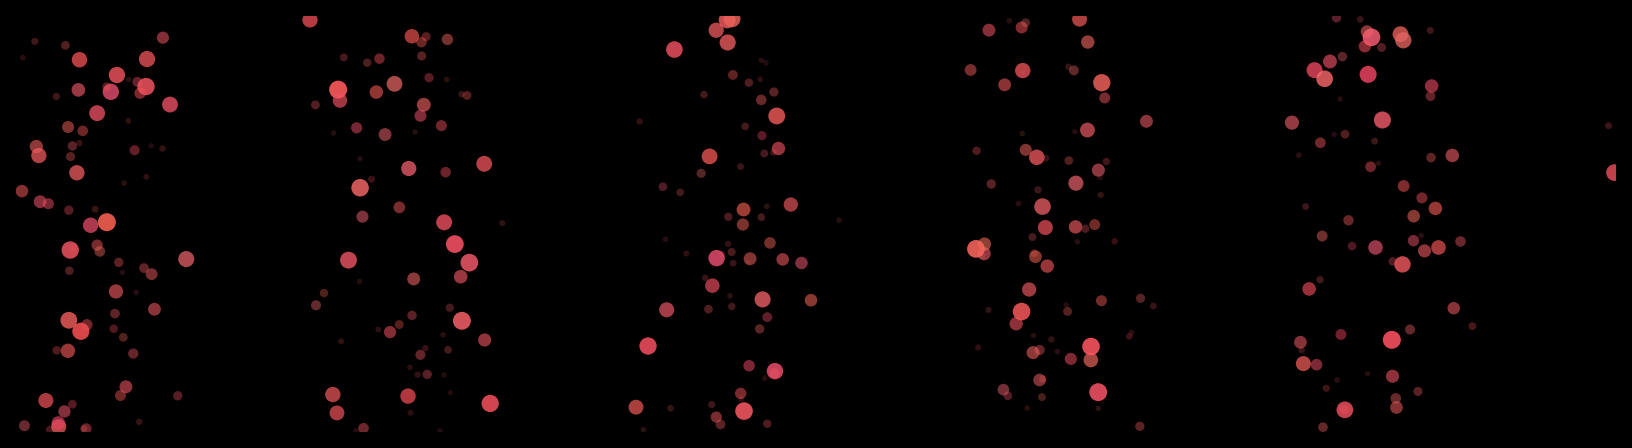

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Controls ----------
W, H = 10, 2.6
N = 900
seed = 7

bands = 5          # number of pressure zones
strength = 1.6     # density contrast
# ----------------------------

rng = np.random.default_rng(seed)

# Base random positions
x = rng.random(N)
y = rng.random(N)

# ---- Density modulation (sound pressure) ----
# Create longitudinal standing wave
pressure = 1 + strength * np.sin(2*np.pi*bands*x)

# Acceptance-rejection sampling for density
mask = rng.random(N) < pressure / pressure.max()
x = x[mask]
y = y[mask]

# Fake depth
depth = rng.random(len(x))
sizes = 6 + 60 * (depth**2)
alpha = 0.15 + 0.75 * (depth**1.5)

# Slight reddish variation
base = np.array([0.95, 0.35, 0.38])
tint = rng.normal(0, 0.03, (len(x), 3))
colors = np.clip(base + tint, 0, 1)

# ---- Plot ----
fig, ax = plt.subplots(figsize=(W, H), dpi=160)
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

ax.scatter(x, y, s=sizes, c=colors, alpha=alpha, linewidths=0)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout(pad=0)
plt.show()


- Sound exists in space — and space itself affects it.
- Even geometry shapes sound: when a wave hits a wall, part of it reflects back with a different phase, changing the original signal. 
- Every surface, corner, and room dimension becomes part of the sound - especially in the corners, where multiple surfaces meet (wall–ceiling intersections), causing energy to stack up and low-frequency energy to accumulate.
# 
There are three fundamental things you should understand:
1. Reflection - sound bouncing off surfaces, like light from a mirror.
2. Absorption - sound energy being absorbed into materials (like acoustic foam), usually converted into heat.
3. Diffusion - sound being scattered in different directions: one single vector of sound becomes a small cloud (usually caused by complex or irregular surface geometry).

<div>
<img src="cookbook_images/DIAGRAM_SHOWING_ABSORPTION_DIFFUSION_AND_REFLECTION_OF_SOUND_480x480.webp">
</div>

How different frequeincies behave in space:
- Low frequencies have long wavelengths and spread almost everywhere (nearly 360°), wrapping around objects and filling rooms.
- High frequencies have shorter wavelengths, are more fragile, and far more directional - they don’t spread that well, reflect sharply, and fade faster with distance.
- Air absorption (air also has resistance, like any elastic medium) literally eats high frequencies first.
- That’s why bass travels through walls, while brightness can disappear simply by turning your head away from the source.

# 
Here's a waterfall (or group decay) graph.
- This graph is a result of room measurment.
- It shows how long different frequencies persist in the room - in other words, how quickly they decay.
- Using this graph, you can clearly see what’s happening inside the room, identify problem areas, and figure out how to fix them.
- **Most of the time it’s not the speakers or microphones that are the problem - it’s their placement and the room acoustics. These two factors are usually responsible for the majority of issues.**
- In an untreated room, reflections, reverberation, and phase problems can pile up fast. Sound starts fighting itself, and it becomes almost impossible to record well - or even judge audio accurately - no matter how good your microphones and speakers are.

<div>
<img src="cookbook_images/3b+REW+uncontrolled+waterfall+option+1+small+notes.webp"
</div>

- Essentially, given a frequency and a distance, you can end up with a comb filter — delayed audio folding back onto itself at different phases.
- This 'filter' is simply the result of frequency, distance, and surface reflections interacting.
- How it works:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import ipywidgets as widgets
from IPython.display import display

C = 343.0  # speed of sound (m/s)

def comb_mag_db(f, tau, a=0.7):
    # Feedforward comb: H(f) = 1 + a*e^{-j2πfτ}
    mag = np.sqrt(1 + a*a + 2*a*np.cos(2*np.pi*f*tau))
    return 20*np.log10(np.maximum(mag, 1e-10))

def notch_freqs(tau, k_max=10):
    # For a>0 (same polarity), notches at (2k+1)/(2τ)
    k = np.arange(0, k_max)
    return (2*k + 1) / (2*tau)

def hz_formatter(x, pos):
    if x >= 1000:
        return f"{x/1000:.0f}k"
    return f"{int(x)}"

def plot_wall_comb(
    distance_to_wall_m=0.50,
    a=0.70,
    f_min=20,
    f_max=20000,
    n_points=6000,
    show_notches=30,
):
    # Round-trip path difference Δd = 2*d
    delta_d = 2.0 * distance_to_wall_m
    tau = delta_d / C  # seconds

    # LOG-spaced frequency grid (audio-style)
    f = np.logspace(np.log10(f_min), np.log10(f_max), n_points)
    mag_db = comb_mag_db(f, tau, a=a)

    df = 1.0 / tau
    notches = notch_freqs(tau, k_max=show_notches)
    notches_in_range = notches[(notches >= f_min) & (notches <= f_max)]

    plt.figure(figsize=(10.5, 4.5))
    plt.semilogx(f, mag_db)
    plt.ylim(-30, 6)
    plt.xlim(f_min, f_max)
    plt.grid(True, which="both", ls="--", alpha=0.35)

    # Audio ticks: 20 Hz → 20 kHz
    ticks = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
    plt.xticks(ticks)
    plt.gca().xaxis.set_major_formatter(FuncFormatter(hz_formatter))

    # Mark notch lines (subtle)
    for nf in notches_in_range:
        plt.axvline(nf, alpha=0.10)

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.title(
        f"Wall comb (dry + reflection): distance={distance_to_wall_m:.2f} m → τ={tau*1000:.2f} ms\n"
        f"Comb spacing Δf (spacing between teeth) ≈{df:.1f} Hz | reflection level a={a:.2f} | (Δd = 2·distance, round-trip)",
    )
    plt.show()

    if len(notches_in_range) > 0:
        txt = ", ".join(f"{x:.1f}" for x in notches_in_range[:10])
        print(f"First notches (Hz): {txt}")
    else:
        print("No notches in range for current settings.")

dist = widgets.FloatSlider(
    value=0.50, min=0.05, max=5.0, step=0.01,
    description="Wall/surface distance (one-way, m)", readout_format=".2f",
    style={"description_width": "300px"},
    layout=widgets.Layout(width="720px")
)
a = widgets.FloatSlider(
    value=0.70, min=0.0, max=0.99, step=0.01,
    description="Surface reflectivity (a)", readout_format=".2f",
    style={"description_width": "300px"},
    layout=widgets.Layout(width="720px")
)
ui = widgets.VBox(
    [dist, a],
    layout=widgets.Layout()
)
out = widgets.interactive_output(
    plot_wall_comb,
    {"distance_to_wall_m": dist, "a": a}
)
display(ui, out)



Output()

And here's a really good video to help you understand this concept (I'm sorry for the freedom units, 1 m ~ 3 feet):
https://www.youtube.com/watch?v=JPYt10zrclQ


<div>
<img src="cookbook_images/equilateral-triangle-speakers.jpg">
</div>

Sidenote: A very common mistake people make is pointing speakers into walls or random directions.

Speakers should be placed in an equilateral triangle with the listening position, with ~60° between the speakers, equal distances, angled toward you, and with the tip of the triangle landing just behind the listener’s head.

The tweeters (high-frequency drivers) should point directly at your ears and be positioned at ear level.

If the geometry is wrong, you are no longer hearing a reliable representation of the signal.

**A quick introduction to Psychoacoustics**

Our ears and brains lie to us!
# 
- Human hearing is not a perfect measurement tool - and just like optical illusions exist, our auditory system is also not perfect.
- Psychoacoustics is an applied field of science that studies this. Basically, it explains *why you think* you hear things the way you do - even when physics disagrees.

There are two main topics to discuss:
# 
1. **Fletcher-Munson curves (Equal-loudness contour)**
<div style="background:white; padding:20px; width:720px;">
<img src="cookbook_images/Lindos1.svg" width="680">
</div>

It looks scary - I know.
#
- **Phon** is a unit of human subjective loudness.
- These curves are the result of large listening tests with many people, and they are periodically refined as measurements improve.
- Our ears have non-linear behavior depending on frequency and amplitude.
- As you can see, very low frequencies need to be much louder for us to even start hearing them, while the midrange is where we are most sensitive (for evolutionary reasons - speech, danger cues, etc.).
- Main lesson here: things tend to sound better when they are louder, because our auditory system perceives more of the frequency spectrum (more lows and more highs).
- This trick is frequently used by bad audio plugin developers: they add a couple of dB to the plugin’s output by default, exploiting loudness bias to make it seem *“better”* - when in reality it can actually be worse.
- When you’re comparing things (especially before and after), always compensate for level (volume) first - otherwise you might be lying to yourself.
# 
2. **Frequency Masking**
<div style="background:white; padding:20px; width:720px;">
<img src="cookbook_images/Audio_Mask_Graph.png" width="680">
</div>

- Often, we cannot hear parts of a sound because something else is masking them.
- The most common and important form of this is **frequency masking** - when a strong sound at one frequency makes weaker nearby frequencies inaudible.
- When two frequencies are close to each other, the louder one will mask the weaker one.
- This is one of the core principles behind lossy audio compression (for example, MP3): masked frequencies are simply removed. Whenever possible, use lossless formats like **FLAC** - and if file size is critical, Opus does a much better job.

**Useful test signals and their kinds**

1. White noise - random noise with equal energy at all frequencies (flat spectrum).
2. Pink noise - noise with a downward slope (−3 dB per octave, more low frequencies, fewer highs), meaning equal energy per octave. This better matches how we hear sound.
3. Sweep - a sine wave that moves continuously through frequencies (usually from 20 Hz to 20 kHz). Great for measuring frequency response.
4. Impulse - a very short blip of sound (often 5-10 ms of 1 kHz). Used to check timing, latency, alignment, and transient (initial attack / hit at the start) behavior.

Use them in your audio processing testing (sometimes one 10-second noise sample can save a couple of weeks or so).

Let's have a look:

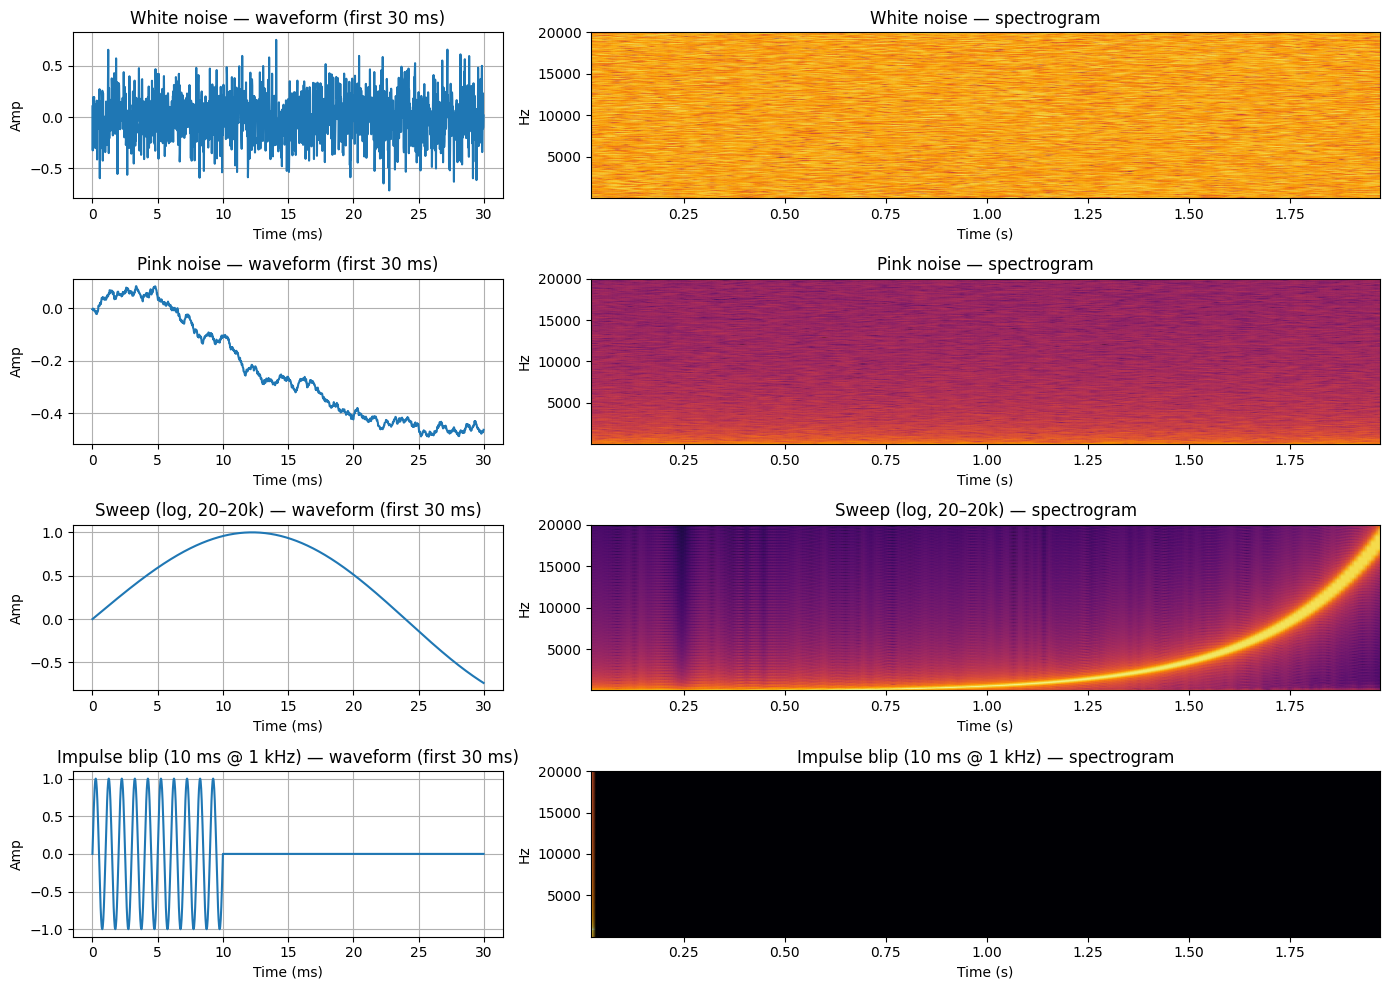

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

fs = 48_000
duration = 2.0
t = np.arange(int(fs*duration)) / fs

# ---------------- Signals ----------------

# 1) White noise
white = np.random.randn(len(t))

# 2) Pink noise
def pink_noise(n):
    rows = 16
    array = np.random.randn(rows, n)
    array = np.cumsum(array, axis=1)
    pink = np.sum(array, axis=0)
    pink /= np.max(np.abs(pink))
    return pink

pink = pink_noise(len(t))

# 3) Log sweep (20 Hz -> 20 kHz)
f0, f1 = 20.0, 20_000.0
r = f1 / f0
phase = 2*np.pi*(f0*duration/np.log(r))*(r**(t/duration) - 1.0)
sweep = np.sin(phase)

# 4) Impulse "blip" (10 ms @ 1 kHz)
impulse = np.zeros_like(t)
L = int(0.010 * fs)
impulse[:L] = np.sin(2*np.pi*1000*np.arange(L)/fs)

signals = [
    ("White noise", white),
    ("Pink noise", pink),
    ("Sweep (log, 20–20k)", sweep),
    ("Impulse blip (10 ms @ 1 kHz)", impulse),
]

# Normalize for consistent visuals
signals = [(name, sig / (np.max(np.abs(sig)) + 1e-12)) for name, sig in signals]

# ---------------- Plot ----------------

fig, axs = plt.subplots(len(signals), 2, figsize=(14, 10),
                        gridspec_kw={"width_ratios":[1.2, 2.2]})

for i, (name, sig) in enumerate(signals):
    # Waveform: show first 30 ms for readability
    n_show = int(0.03 * fs)
    axs[i, 0].plot(t[:n_show]*1000, sig[:n_show])
    axs[i, 0].set_title(f"{name} — waveform (first 30 ms)")
    axs[i, 0].set_xlabel("Time (ms)")
    axs[i, 0].set_ylabel("Amp")
    axs[i, 0].grid(True)

    # Spectrogram
    f, tt, S = spectrogram(sig, fs=fs, nperseg=2048, noverlap=1536, mode="magnitude")
    SdB = 20*np.log10(S + 1e-12)
    axs[i, 1].pcolormesh(tt, f, SdB, shading="gouraud", cmap="inferno")
    axs[i, 1].set_ylim(20, 20000)
    axs[i, 1].set_title(f"{name} — spectrogram")
    axs[i, 1].set_xlabel("Time (s)")
    axs[i, 1].set_ylabel("Hz")

plt.tight_layout()
plt.show()


## **Sample rate and aliasing, bit depth and quantization noise, and the world-eater - jitter**

*Or how digital audio, ADC (analog-to-digital conversion), and DAC (digital-to-analog conversion) work.*

1. **Sample rate** is how many times sound is measured per second.
- According to the Nyquist theorem (probably the simplest one you will ever learn), the maximum audio frequency that can be represented is sample rate / 2.
- So, for example, at 48 kHz, the highest audio frequency that can be properly represented is 24 kHz.

**Common Sample Rates:**  
| Type | Values | Notes |
|------|--------|-------|
| Standard | 44.1 kHz (CD), 48 kHz (DVD) | Typical for recording and playback. **CD *kinda* myth:** 44.1 kHz was specifically chosen to fit Beethoven's 9th symphony on a disc. **DVD:** 48 kHz aligns beautifully with typical camera framerate of 24 fps. |
| Doubled (×2) | 88.2 kHz, 96 kHz | Used (but not necessarily) in professional recording. Keep in mind it also doubles computations and storage. Provides extra protection (with diminishing returns as you go higher) from aliasing artifacts (bugs) during mixing/processing, but modern-day algorithms that are built properly already have oversampling when necessary. |
| Quadrupled (×4) | 176.4 kHz, 192 kHz | Usually unnecessary, don't go into that category if you don't what you're doing. ~x4 on computations and storage. Poorly designed devices can introduce a lot of jitter (we will cover it soon enough) in this mode. |

- Do not oversample audio to a higher sample rate unless necessary — no meaningful information will be added.
- With modern filters minimal "practically perfect" sample rate is roughly 50 kHz, so 48 kHz is a good rule of thumb.

2. **Aliasing** is what happens when a sound contains frequencies higher than half the sample rate (the maximum representable frequency), and those frequencies get folded back into lower, incorrect frequencies during the digital sampling process.
- Not only can this happen during audio recording, if higher frequencies were not filtered, it can also be created later by non-linear processing (dynamics, distortion, saturation, heavy equalization).
- To prevent this, we oversample during processing and use filters to remove unnecessary high-frequency content before returning to the target sample rate.

A deliberately extreme aliasing example. So you can see that the frequencies are trying to go up to as high as 100 kHz (with added harmonics - or integer multiples), but the sample rate is only 16 kHz. Look at the falling and bouncing lines:

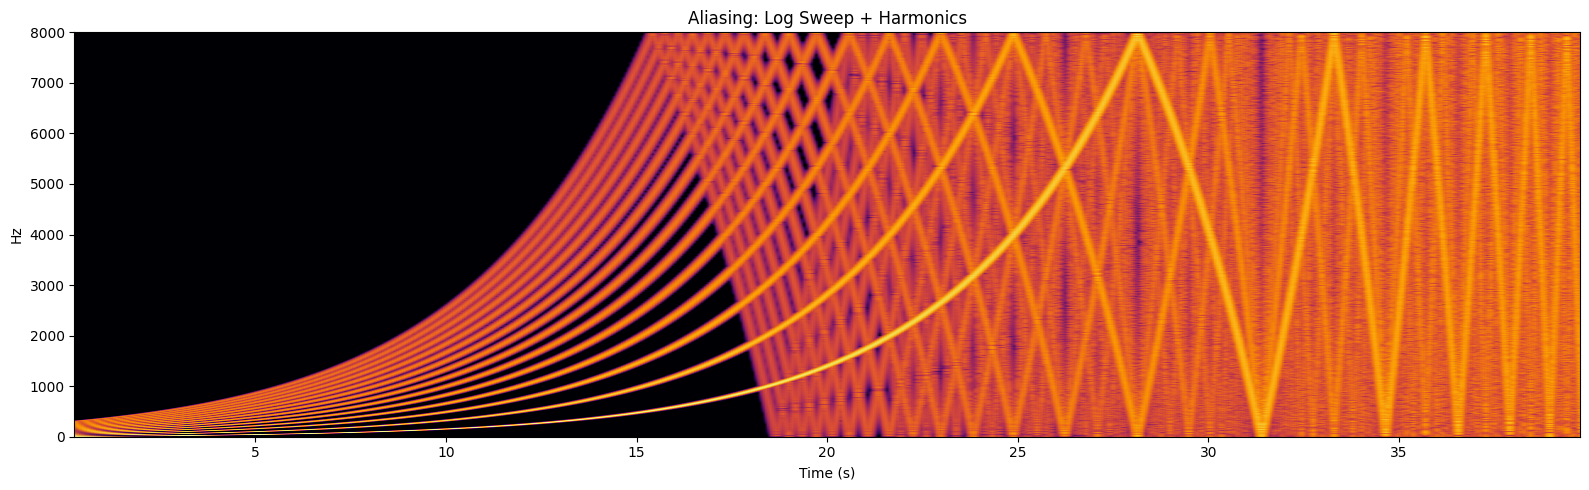

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# ===================== Controls =====================
fs = 16000                
duration = 40.0
f0 = 20.0
f1 = 100000.0            
num_harmonics = 15
harmonic_rolloff = 1.1    

nperseg = 8192
noverlap = 7168        
# ==================================================

t = np.arange(int(fs * duration)) / fs

# Log sweep phase
r = f1 / f0
phase = 2*np.pi*(f0*duration/np.log(r))*(np.power(r, t/duration) - 1)

# Harmonic stack
x = np.zeros_like(t)
for k in range(1, num_harmonics + 1):
    x += (1/(k**harmonic_rolloff)) * np.sin(k * phase)

x /= np.max(np.abs(x))

f, tt, Sxx = spectrogram(
    x,
    fs=fs,
    window="blackmanharris",
    nperseg=nperseg,
    noverlap=noverlap,
    mode="magnitude"
)

Sdb = 20*np.log10(Sxx + 1e-12)

plt.figure(figsize=(16,5))
plt.pcolormesh(tt, f, Sdb, shading="gouraud", cmap="inferno")
plt.ylim(0, fs/2)
plt.clim(-120, -20)       # contrast
plt.xlabel("Time (s)")
plt.ylabel("Hz")
plt.title("Aliasing: Log Sweep + Harmonics")
plt.tight_layout()
plt.show()


3. **Bit Depth** is the number of bits used for each and every sample. 
- It determines the dynamic range of the sound — in other words, how quiet the signal level can be represented relative to digital full scale (or how deep into the minuses we can go). 
- Digital level uses a negative scale: it starts at 0 dBFS and goes downward, with lower bit depths introducing more quantization noise.

**Common Bit Depths:**  
| Type | Values | Notes |
|------|--------|-------|
| Integer | 16 bit, 24 bit | 16 bit is a basic standard, with 24 bit used in professional audio due to lower noise floor. In integer formats, each bit represents about 6 dB of dynamic range (a doubling of signal amplitude), so the total range is easy to calculate: 16 bit ~ -96 dBFS (from 0 to −96), and 24 bit ~ -144 dBFS. Although modern ADC/DACs (analog-to-digital and digital-to-analog conversion) use delta-sigma architectures internally, they present audio to the system as integer values — this is the representation you usually work with. With each additional bit you get twice the resolution (you can represent signals twice as quiet) and roughly half of the quantization noise (if you've ever used WaveRNN you will know the pain).  |
| Float | 32 bit | Used internally, representing an enormous range of over 1500 dB (~−770 to +770 dB). Widely used in professional audio and machine learning (where using float is essential). This is mainly a 'quality-of-life' improvement to prevent internal clipping or data loss during processing — it does not improve noise floor or distortion (it's essentially a trick to add massive range on top of ~24 bit int precision). |

4. **Quantization Noise (or Distortion, really)** is an error created by rounding a continuous signal (like an audio waveform) to a finite (discrete) representation.

- **Dithering** is the intentional addition of low-level noise to a signal to decorrelate and mask quantization errors. Effectively, dither doesn't remove errors - it randomizes them.
- Dithering converts harsh distortion into low-level hiss.
- Quantization noise originates in the lowest bits, but manifests as broadband noise. So the more bits you add - the less noise you have (but only in terms of digital noise introduced during the conversion process - it won't fix other problems).
- Here's an example of 8-bit and 16-bit representations. As you can see, at 8-bit harsh harmonic distortion is created without dithering. Dithering masks these errors, but you can clearly see the added noise (and obviously you will hear it). At 16-bit it's practically unnoticeable (even without dithering - but you still should use it).

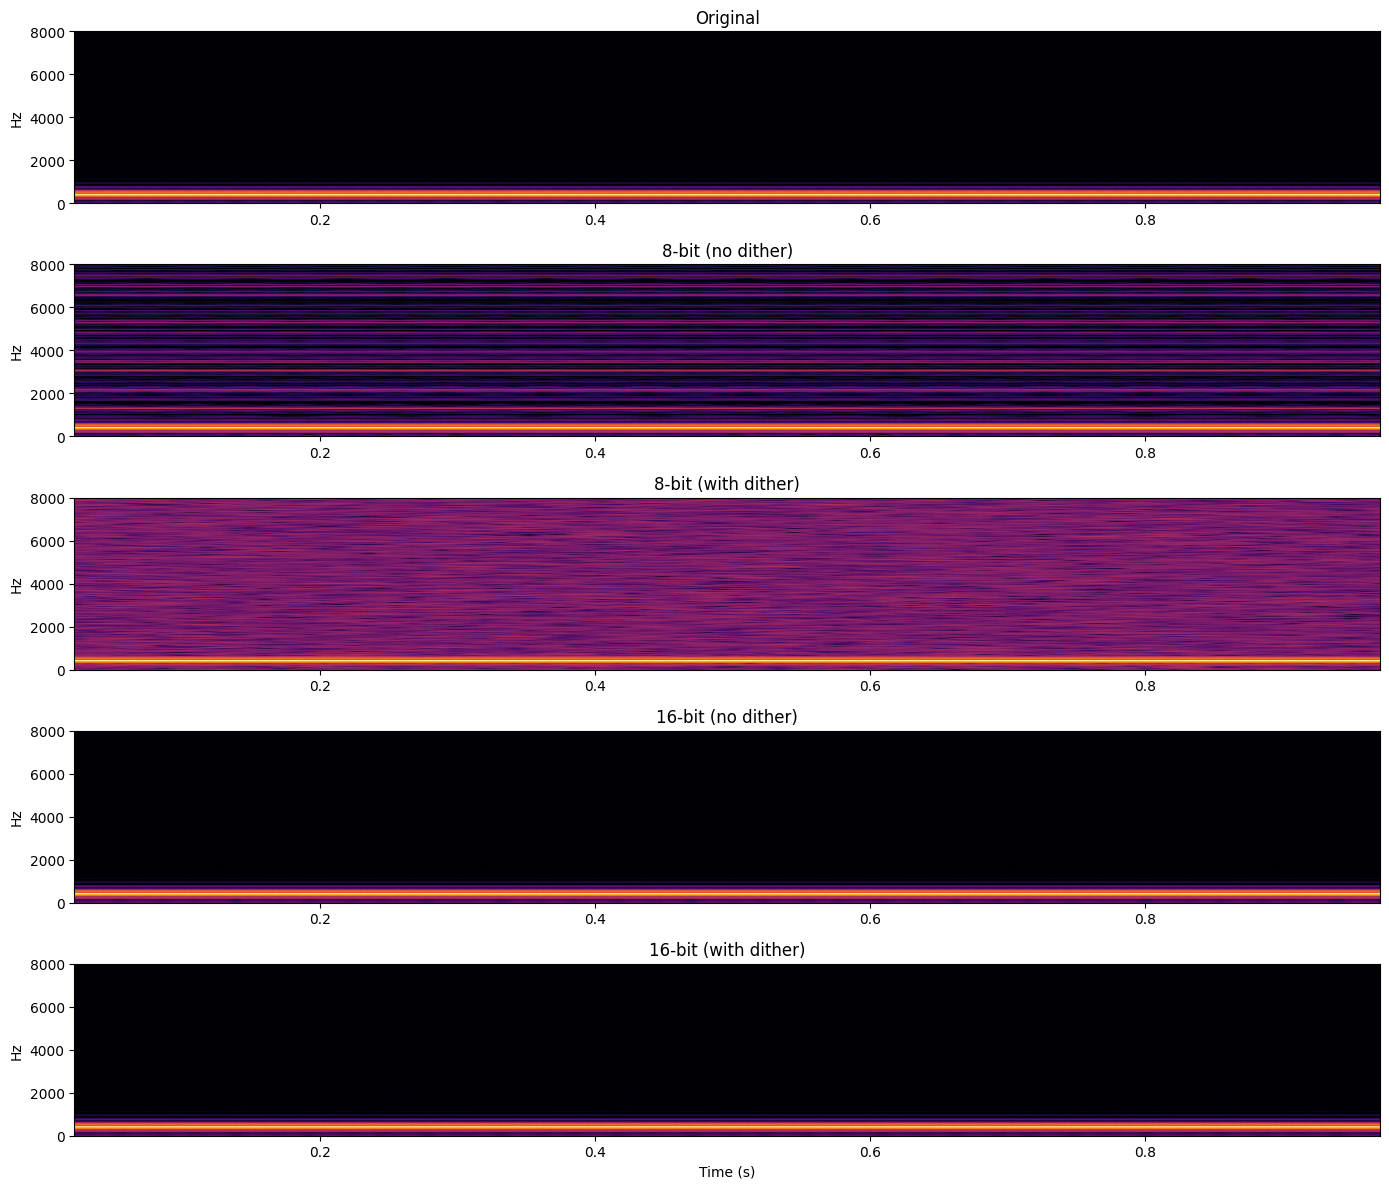

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

fs = 48000
t = np.linspace(0, 1, fs, endpoint=False)

# Quiet sine to expose quantization noise
x = 0.05 * np.sin(2*np.pi*440*t)

def quantize(signal, bits):
    levels = 2**bits
    return np.round(signal * (levels/2)) / (levels/2)

# TPDF dither
def dither(signal, bits):
    lsb = 1.0 / (2**bits)
    noise = np.random.uniform(-lsb, lsb, size=signal.shape) + \
            np.random.uniform(-lsb, lsb, size=signal.shape)
    return signal + noise

# Without dither
x8 = quantize(x, 8)
x16 = quantize(x, 16)

# With dither
x8_d = quantize(dither(x, 8), 8)
x16_d = quantize(dither(x, 16), 16)

def plot_spec(sig, title, ax):
    f, tt, S = spectrogram(sig, fs=fs, nperseg=2048, noverlap=1536)
    SdB = 20*np.log10(S + 1e-12)
    ax.pcolormesh(tt, f, SdB, shading="gouraud", cmap="inferno")
    ax.set_ylim(0, 8000)
    ax.set_title(title)
    ax.set_ylabel("Hz")

fig, axs = plt.subplots(5, 1, figsize=(14,12))

plot_spec(x, "Original", axs[0])
plot_spec(x8, "8-bit (no dither)", axs[1])
plot_spec(x8_d, "8-bit (with dither)", axs[2])
plot_spec(x16, "16-bit (no dither)", axs[3])
plot_spec(x16_d, "16-bit (with dither)", axs[4])

axs[-1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()


5. **Jitter** is a form of distortion caused by timing deviations in the sampling clock during the discretization process.
- When we convert the audio, we set sample rate and use clock to time it.
- In a perfect world, we would end up with an ideal distribution of samples per second (for example, 48,000 perfectly spaced points).
- In reality, clock instability causes small timing errors between samples - this is jitter.
- That's why setting poorly designer devices to extremely high sample rates can actually make things worse: even if they say they *'support'* it, it doesn’t mean they can do it accurately.

Here's a visualization of how it works:

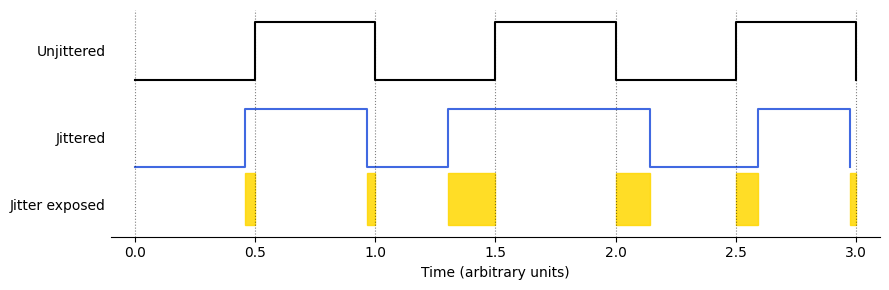

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Controls ----------------
period = 1.0
cycles = 3
jitter = 0.08
seed = 2
# ------------------------------------------

rng = np.random.default_rng(seed)

# Ideal transition times (0, 0.5, 1.0, 1.5, ...)
edges_ideal = np.arange(0, cycles * period + 0.5 * period, 0.5 * period)

# Jitter the edges (keep them monotonic)
edges_jittered = edges_ideal + rng.normal(0.0, jitter * period, size=edges_ideal.shape)
edges_jittered[0] = edges_ideal[0]
edges_jittered = np.maximum.accumulate(edges_jittered)

def step_xy(edges, low=0.0, high=1.0):
    x, y = [], []
    level = low
    x.append(edges[0]); y.append(level)
    for i in range(1, len(edges)):
        x.append(edges[i]); y.append(level)     # horizontal
        level = high if level == low else low   # flip
        x.append(edges[i]); y.append(level)     # vertical
    return np.array(x), np.array(y)

x0, y0 = step_xy(edges_ideal)
x1, y1 = step_xy(edges_jittered)

# ---- Plot ----
fig, ax = plt.subplots(figsize=(9, 3))

# More separation between the two waves
y_top = 2.7   # black higher
y_mid = 1.2   # blue lower

ax.plot(x0, y0 + y_top, color="black")
ax.plot(x1, y1 + y_mid, color="royalblue")

# Dotted vertical lines at ideal edges
for e in edges_ideal:
    ax.axvline(e, color="black", lw=0.8, ls=":", alpha=0.5)

# Yellow "jitter exposed" spans (bottom band only)
for ei, ej in zip(edges_ideal[1:], edges_jittered[1:]):
    ax.axvspan(min(ei, ej), max(ei, ej), ymin=0.05, ymax=0.28, color="gold", alpha=0.85)

# Cosmetics
ax.set_xlim(edges_ideal[0] - 0.1, edges_ideal[-1] + 0.1)
ax.set_ylim(0.0, 3.9)

ax.set_yticks([y_top + 0.5, y_mid + 0.5, 0.55])
ax.set_yticklabels(["Unjittered", "Jittered", "Jitter exposed"])

ax.set_xlabel("Time (arbitrary units)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(axis="y", length=0)
ax.grid(False)

plt.tight_layout()
plt.show()


Now here’s how jitter looks on a spectrogram:

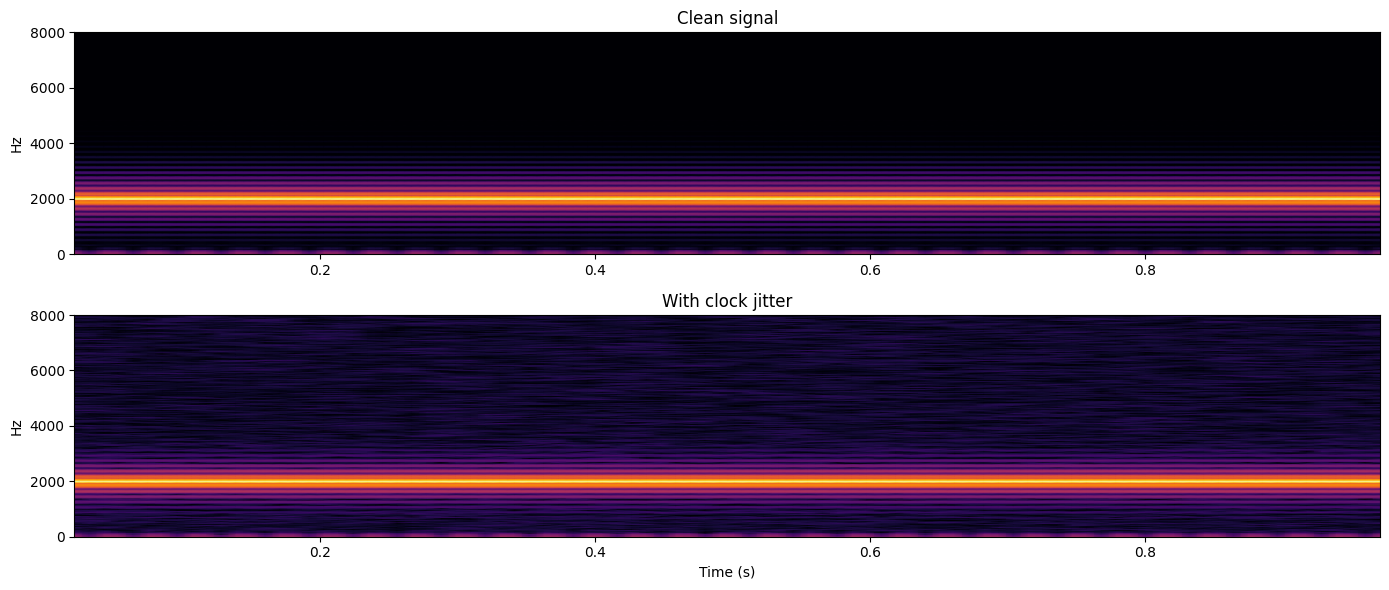

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

fs = 48000
duration = 1.0
freq = 2000

t = np.arange(int(fs * duration)) / fs

# Clean sine
x_clean = np.sin(2*np.pi*freq*t)

# Add jitter (random timing errors)
jitter_amount = 50e-9   # 50 ns jitter (exaggerated for visualization)
jitter = np.random.randn(len(t)) * jitter_amount
t_jittered = t + jitter

x_jitter = np.sin(2*np.pi*freq*t_jittered)

def plot_spec(sig, title, ax):
    f, tt, S = spectrogram(sig, fs=fs, nperseg=2048, noverlap=1536)
    SdB = 20*np.log10(S + 1e-12)
    ax.pcolormesh(tt, f, SdB, shading="gouraud", cmap="inferno")
    ax.set_ylim(0, 8000)
    ax.set_title(title)
    ax.set_ylabel("Hz")

fig, axs = plt.subplots(2, 1, figsize=(14,6))

plot_spec(x_clean, "Clean signal", axs[0])
plot_spec(x_jitter, "With clock jitter", axs[1])

axs[1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()


So, as a summary:
- **Aliasing breaks frequencies.**
- **Quantization breaks amplitudes.**
- **Jitter breaks time.**

Here’s another great video to help bring Jazz, Physics, Neurons, and Human Perception together - it explores human evolution, the physics of sound and neurons, and information theory: https://www.youtube.com/watch?v=Gc5eICzHkFU

Thank you for your time, and best of luck to you!
# 
Remember to always question your knowledge, test things, and learn new ones.
# 
***"I'm smart enough to know that I'm stupid."*** - **Richard Feynman**